# Reporte de Resultados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io import arff
import json
pd.set_option('display.max_rows', None)  # This line allows all rows to be displayed
pd.set_option('display.max_columns', None)  # This line allows all columns to be displayed


*Madelon*: Este es un conjunto de datos artificial con 500 características, donde el objetivo es un XOR multidimensional con cinco características relevantes. Fue creado para el desafío de Selección de Características NIPS 2003[^15], y está disponible en el Repositorio UCI[^16]. De las 495 características restantes, 15 corresponden a combinaciones lineales de las cinco relevantes, y las otras 480 son características de ruido. Madelon es un problema de clasificación de dos clases con variables de entrada binarias dispersas. Las dos clases están equilibradas, y los datos se dividen en conjuntos de entrenamiento y prueba.
[^15]: <http://clopinet.com/isabelle/Projects/NIPS2003/>

[^16]: <http://archive.ics.uci.edu/ml/datasets.html>

In [2]:
data = pd.read_csv('experiments_results.csv')

In [3]:
data.tail(3)

,experiment_name,date,description,current_dir,POP_SIZE,PROB_MUT,PX,GMAX,DAT_SIZE,all_features_fitness,all_feature_ngenes,all_feature_acc,elite_fitness,elite_ngenes,elite_acc,pob_fitness_avg,pob_accuracy_avg,pob_ngenes_avg,pob_fitness_std,pob_accuracy_std,pob_ngenes_std,pob_fitness_max,pob_accuracy_max,pob_ngenes_max
422,gcm_base_0040_2,2024-06-13,gene01_mut160_cvaelossL1_genevalonsyn_gatraino...,/root/ealab/expga1,100,160,0.75,20,144,0.076,16063,0.152,0.713,1548,0.522,0.713,0.522,1548.0,0.0,0.0,0.0,0.713,0.522,1548
423,gcm_base_0040_3,2024-06-14,gene01_mut160_cvaelossL1_genevalonsyn_gatraino...,/root/ealab/expga1,100,160,0.75,20,144,0.076,16063,0.152,0.701,1566,0.500,0.701,0.500,1566.0,0.0,0.0,0.0,0.701,0.500,1566
424,gcm_base_0040_4,2024-06-14,gene01_mut160_cvaelossL1_genevalonsyn_gatraino...,/root/ealab/expga1,100,160,0.75,20,144,0.076,16063,0.152,0.714,1500,0.522,0.714,0.522,1500.0,0.0,0.0,0.0,0.714,0.522,1500


# Exploración de la selección de características

En esta sección exploramos la selección de características en los experimentos buscando diferenciar entre los experimentos con datos originales y aumentados.

In [25]:
# Replace 'your_file.json' with the path to your JSON file
with open('experiments.json', 'r') as file:
    features = json.load(file)
# Read 'experiments2.json' file and merge it with 'experiments.json'
# with open('experiments2.json', 'r') as file:
#     features2 = json.load(file)
#     for key, value in features2.items():
#         features[key].update(value)


In [5]:
for key, value in list(features.items())[:2]:
    print(f'Experiment: {key}')
    common_genome_all_prob = value['common_genome_all_prob']
    common_genome_bin = value['common_genome_bin']
    common_genome_bin_sum = value['common_genome_bin_sum']
    common_genome_prob_sum = value['common_genome_prob_sum']
    selected_features_bin = value['selected_features_bin']
    selected_features_prob = value['selected_features_prob']
    print(f'    common genome: {common_genome_all_prob[:20]}')
    print(f'    common genome len: {len(common_genome_all_prob)}')
    print(f'    common genome bin: {common_genome_bin[:20]}')
    print(f'    common genome bin len: {len(common_genome_bin)}')        
    print(f'    common genome bin sum: {common_genome_bin_sum}')
    print(f'    common genome prob sum: {common_genome_prob_sum}')
    print(f'    selected features bin: {selected_features_bin[:3]}')    
    print(f'    selected features prob: {selected_features_prob[:3]}')
    

Experiment: leukemia_base_0001_0
    common genome: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    common genome len: 7129
    common genome bin: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    common genome bin len: 7129
    common genome bin sum: 680
    common genome prob sum: 680
    selected features bin: ['AFFX-BioB-3_at', 'AFFX-ThrX-5_at', 'AFFX-ThrX-3_at']
    selected features prob: ['AFFX-BioB-3_at', 'AFFX-ThrX-5_at', 'AFFX-ThrX-3_at']
Experiment: leukemia_base_0001_1
    common genome: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    common genome len: 7129
    common genome bin: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    common genome bin len: 7129
    common genome bin sum: 700
    common genome prob sum: 700
    selected features bin: ['AFFX-TrpnX-5_at', 'AFFX-HUMISGF3A/M97935_MB_at', 'AFFX-HUMGAPDH/M33197_5_at']
    sele

## Feature Frequency by Experiments

In [26]:
result_acc_features = []

for key, value in features.items():    
    result = {}
    selected_features_bin = value['selected_features_bin']
    experiment_name = key
    result = {'experiment_name': experiment_name, 'selected_features_bin': selected_features_bin}    
    result_acc_features.append(result)   

In [27]:
# Create a DataFrame from the list of dictionaries and add form 'data' the columns 'pob_accuracy_avg' and 'pob_ngenes_avg' using the 'experiment_name' as key
result_acc_features = pd.DataFrame(result_acc_features)
result_acc_features = result_acc_features.merge(data[['experiment_name', 'pob_accuracy_avg', 'pob_ngenes_avg']], on='experiment_name')

In [28]:
result_acc_features.head(3)

,experiment_name,selected_features_bin,pob_accuracy_avg,pob_ngenes_avg
0,leukemia_base_0001_0,"[AFFX-BioB-3_at, AFFX-ThrX-5_at, AFFX-ThrX-3_a...",1.0,680.0
1,leukemia_base_0001_1,"[AFFX-TrpnX-5_at, AFFX-HUMISGF3A/M97935_MB_at,...",1.0,700.0
2,leukemia_base_0001_2,"[AFFX-BioC-3_at, AFFX-CreX-3_st, AFFX-PheX-5_a...",1.0,674.0


In [29]:
result_acc_features = result_acc_features[result_acc_features['experiment_name'].str.contains('mandelon')]
# extract the firts 18 letters of the experiment name
result_acc_features['experiment_group'] = result_acc_features['experiment_name'].apply(lambda x: x[:18])
# count the unique value on the column 'experiment_name'
result_acc_features['experiment_group'].value_counts()

experiment_group
mandelon_synthetic    30
mandelon_base_0023    30
mandelon_base_0017    19
mandelon_base_0004    10
mandelon_base_0021     2
Name: count, dtype: int64

In [31]:
result_acc_features = result_acc_features[result_acc_features['experiment_group'] != 'mandelon_base_0004']
result_acc_features = result_acc_features[result_acc_features['experiment_group'] != 'mandelon_base_0021']

In [33]:
# rename experiment names label 
result_acc_features = result_acc_features.replace('mandelon_base_0017', 'mandelon_original')
result_acc_features = result_acc_features.replace('mandelon_base_0023', 'mandelon_original')

In [35]:
result_acc_features.head(2)

,experiment_name,selected_features_bin,pob_accuracy_avg,pob_ngenes_avg,experiment_group
256,mandelon_synthetic_0014_0,"[att_4, att_8, att_19, att_26, att_29, att_30,...",0.844,43.0,mandelon_synthetic
257,mandelon_synthetic_0014_1,"[att_16, att_29, att_42, att_50, att_64, att_9...",0.802,26.0,mandelon_synthetic


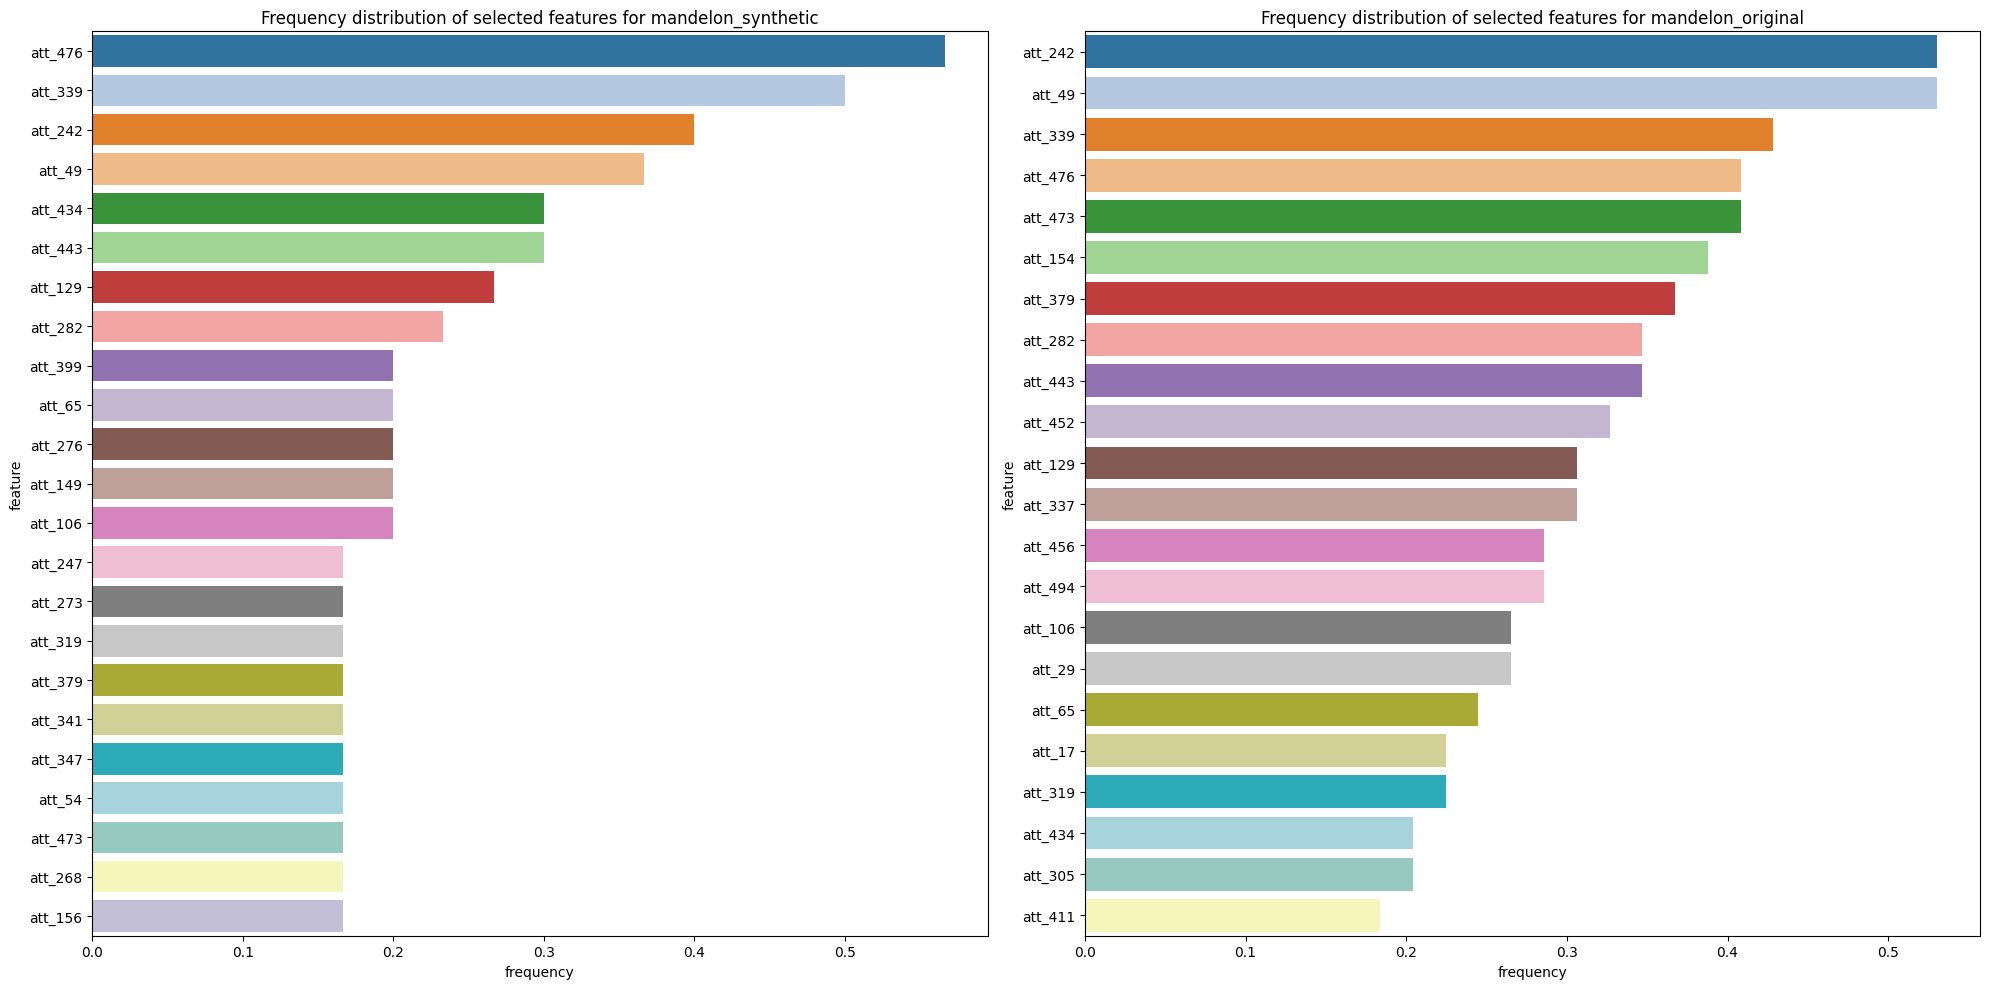

In [40]:
# Initialize an empty dictionary to store feature counts for each experiment group
feature_counts_by_group = {}

# Get the unique experiment groups
experiment_groups = result_acc_features['experiment_group'].unique()

# Calculate the frequency of features for each experiment group
for group in experiment_groups:
    all_features = []
    group_data = result_acc_features[result_acc_features['experiment_group'] == group]
    n_experiments = len(group_data)
    for features in group_data['selected_features_bin']:
        all_features.extend(features)
    feature_counts = pd.Series(all_features).value_counts() / n_experiments
    feature_counts = feature_counts[feature_counts >= 0.15]  # select features with frequency greater than 0.1
    feature_counts = feature_counts.sort_values(ascending=False)
    feature_counts = feature_counts.reset_index()
    feature_counts.columns = ['feature', 'frequency']
    feature_counts_by_group[group] = feature_counts

# Define a color palette with 30 distinct colors
palette = sns.color_palette("tab20", n_colors=20) + sns.color_palette("Set3", n_colors=10)


# Plot the frequency distribution for each experiment group side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

for ax, (group, feature_counts) in zip(axes, feature_counts_by_group.items()):
    sns.barplot(x='frequency', y='feature', data=feature_counts,palette=palette[:len(feature_counts)], ax=ax)
    ax.set_title(f'Frequency distribution of selected features for {group}')

plt.tight_layout()
plt.show()


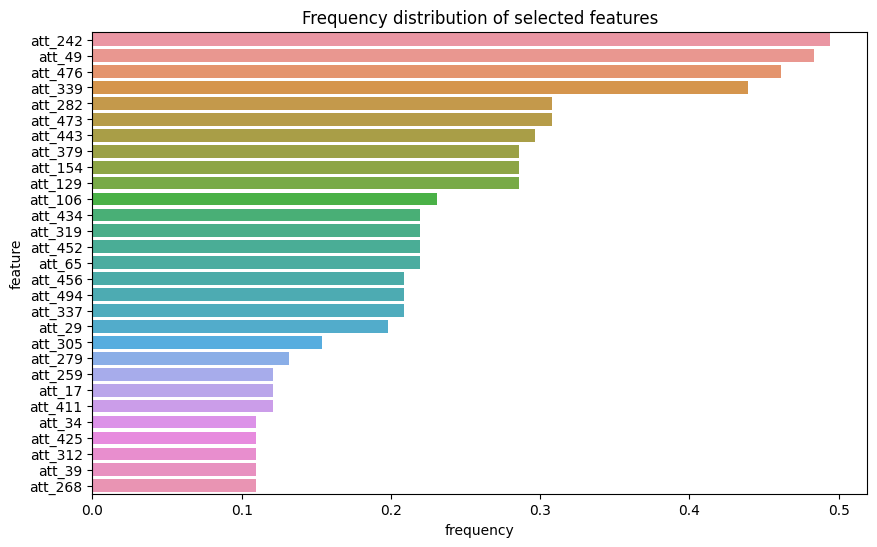

In [11]:
# combine all the selected features in a single list and plot the frequency distribution
all_features = []
n_experiments = len(result_acc_features['experiment_name'].value_counts())
for features in result_acc_features['selected_features_bin']:
    all_features.extend(features)
# Count the frequency of each feature and divide by the number of experiments to get the average frequency
feature_counts = pd.Series(all_features).value_counts() / n_experiments
# select features with frequency greater than 0.1
feature_counts = feature_counts[feature_counts >= 0.1]
feature_counts = feature_counts.sort_values(ascending=False)
feature_counts = feature_counts.reset_index()
feature_counts.columns = ['feature', 'frequency']
# plot the frequency distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='feature', data=feature_counts)
plt.title('Frequency distribution of selected features')
plt.show()


In [12]:
# select the top 20 features 
top_features = feature_counts['feature'].values[:20]



In [13]:
# create a new column group with the first 18 letters of the experiment name
result_acc_features['group'] = result_acc_features['experiment_name'].apply(lambda x: x[:18])

In [14]:
leukemia_comparables = [
    'mandelon_base_0004', #original
    'mandelon_synthetic', #syn
    'mandelon_base_0017', # original
    'mandelon_base_0023', # original
    
]
# filter the data to only include the leukemia_comparables
result_acc_features = result_acc_features[result_acc_features['group'].isin(leukemia_comparables)]
result_acc_features['group'].value_counts()


group
mandelon_synthetic    30
mandelon_base_0023    30
mandelon_base_0017    19
mandelon_base_0004    10
Name: count, dtype: int64

In [15]:
# Remove  from the data
result_acc_features = result_acc_features[result_acc_features['group'] != 'mandelon_base_0004']


In [16]:
# split the result_acc_feautures into two groups: original_data and augmented_data based on the list original_data
original_data = ['mandelon_base_0023', 'mandelon_base_0017']
result_acc_features['condition'] = result_acc_features['group'].apply(lambda x: 'original_data' if x in original_data else 'augmented_data')
result_acc_features_original = result_acc_features[result_acc_features['condition'] == 'original_data']
result_acc_features_augmented = result_acc_features[result_acc_features['condition'] == 'augmented_data']

In [17]:
# create a list of element and count the number of elements in the list
print(pd.Series([x[:18] for x in result_acc_features_original['group']]).value_counts())
print(pd.Series([x[:18] for x in result_acc_features_augmented['group']]).value_counts())

mandelon_base_0023    30
mandelon_base_0017    19
Name: count, dtype: int64
mandelon_synthetic    30
Name: count, dtype: int64


# synthetic Dataset

In [18]:
# expand the 'selected_features_bin' column into multiple rows
result_acc_features_original_long = result_acc_features_original.explode('selected_features_bin')
# count the distinct experiment names 
n_experiments_original = result_acc_features_original_long['experiment_name'].nunique()
n_experiments_original  


49

In [19]:
# group by the 'selected_features_bin', count the number of occurrence and concatenate the 'experiment_name' and 'pob_accuracy_avg' columns
result_acc_features_wide_original = result_acc_features_original_long.groupby('selected_features_bin').agg(
    experiment_name=('experiment_name', lambda x: ', '.join(x)),
    # create a list with the 'pob_accuracy_avg' values
    pob_accuracy_avg=('pob_accuracy_avg', list),
    # crate a list with the 'pob_ngenes_avg' values
    pob_ngenes_avg=('pob_ngenes_avg', list),
    count=('experiment_name', 'count')
).reset_index()

In [20]:
result_acc_features_wide_original.sort_values('count', ascending=False).head(3)

,selected_features_bin,experiment_name,pob_accuracy_avg,pob_ngenes_avg,count
151,att_242,"mandelon_base_0017_0, mandelon_base_0017_1, ma...","[0.685, 0.71, 0.762, 0.778, 0.697, 0.71, 0.76,...","[31.0, 36.0, 29.0, 32.0, 41.0, 38.0, 39.0, 45....",26
414,att_49,"mandelon_base_0017_1, mandelon_base_0017_3, ma...","[0.71, 0.753, 0.778, 0.71, 0.785, 0.695, 0.78,...","[36.0, 35.0, 32.0, 38.0, 29.0, 41.0, 31.0, 36....",26
251,att_339,"mandelon_base_0017_2, mandelon_base_0017_3, ma...","[0.73, 0.753, 0.762, 0.778, 0.697, 0.71, 0.763...","[44.0, 35.0, 29.0, 32.0, 41.0, 38.0, 36.0, 39....",21


In [21]:
# print the columns data types
result_acc_features_wide_original.shape


(476, 5)

In [22]:
# save the result to a csv file
result_acc_features_wide_original.to_csv('features_occurrence_original.csv', index=False)

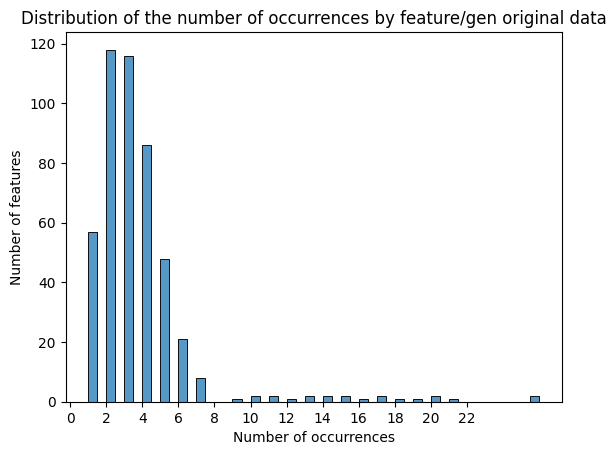

In [23]:
# plot the distribution of the count column
sns.histplot(result_acc_features_wide_original['count'], bins=50)
# make the x-axis integer values
plt.xticks(np.arange(0, 23, 2))
# set the x-axis label
plt.xlabel('Number of occurrences')
# set the y-axis label
plt.ylabel('Number of features')
# show the plot
# title of the plot
plt.title('Distribution of the number of occurrences by feature/gen original data')
plt.show()



In [24]:
# count the number of ocurrence ot top_features in the original data
top_features_original = result_acc_features_wide_original[result_acc_features_wide_original['selected_features_bin'].isin(top_features)]
top_features_original = top_features_original.sort_values('count', ascending=False)
top_features_original = top_features_original.reset_index(drop=True)
# create a column that compute count divided by the number of experiments in the original data
top_features_original['count_normalized'] = round(top_features_original['count'] / n_experiments_original, 2)
top_features_original.head(3)
                                                                                          

,selected_features_bin,experiment_name,pob_accuracy_avg,pob_ngenes_avg,count,count_normalized
0,att_242,"mandelon_base_0017_0, mandelon_base_0017_1, ma...","[0.685, 0.71, 0.762, 0.778, 0.697, 0.71, 0.76,...","[31.0, 36.0, 29.0, 32.0, 41.0, 38.0, 39.0, 45....",26,0.53
1,att_49,"mandelon_base_0017_1, mandelon_base_0017_3, ma...","[0.71, 0.753, 0.778, 0.71, 0.785, 0.695, 0.78,...","[36.0, 35.0, 32.0, 38.0, 29.0, 41.0, 31.0, 36....",26,0.53
2,att_339,"mandelon_base_0017_2, mandelon_base_0017_3, ma...","[0.73, 0.753, 0.762, 0.778, 0.697, 0.71, 0.763...","[44.0, 35.0, 29.0, 32.0, 41.0, 38.0, 36.0, 39....",21,0.43


## Gráfico de frecuencia de selección de características en los experimentos con dataset original

In [ ]:
# Assuming the DataFrame is already loaded as df
df = result_acc_features_wide_original

# Filter the top 50 features by 'count'
top_features = df.nlargest(200, 'count')

# Expand the 'pob_accuracy_avg' and 'experiment_name' into individual rows
expanded_rows = []
for index, row in top_features.iterrows():
    accuracies = row['pob_accuracy_avg']
    experiment_names = row['experiment_name'].split(', ')
    
    if isinstance(accuracies, str):
        accuracies = eval(accuracies)

    for accuracy, exp_name in zip(accuracies, experiment_names):
        if 'leukemia_base_0008' not in exp_name.strip():
            expanded_rows.append({
                'selected_features_bin': row['selected_features_bin'],
                'pob_accuracy_avg': accuracy,
                'experiment_name': exp_name.strip()
            })

expanded_df = pd.DataFrame(expanded_rows)

# Create a pivot table for the heatmap
pivot_table = expanded_df.pivot_table(index='selected_features_bin', columns='experiment_name', values='pob_accuracy_avg', aggfunc='mean')

average_accuracy = pivot_table.mean(axis=1).sort_values(ascending=False)
sorted_pivot_table = pivot_table.loc[average_accuracy.index]

# Plot heatmap without annotations and sorted by average accuracy
plt.figure(figsize=(15, 30))  # Adjust the size accordingly
sns.heatmap(sorted_pivot_table, annot=False, cmap='viridis')
plt.title('Heatmap of Top 200 Features by Population Accuracy Average, Sorted')
plt.xlabel('Experiment Name')
# adjust the y-axis to include all the features
plt.yticks(np.arange(0.5, len(sorted_pivot_table), 1), sorted_pivot_table.index)
plt.ylabel('Selected Features')
# Save the plot to a file
plt.savefig('heatmap_top200_features_original.png', format='png', dpi=300)  # You can specify another path or format like 'pdf'
plt.show()


# Augmented Dataset

In [95]:
# expand the 'selected_features_bin' column into multiple rows
result_acc_features_augmented_long = result_acc_features_augmented.explode('selected_features_bin')
result_acc_features_augmented_long.head(3)




,experiment_name,selected_features_bin,pob_accuracy_avg,pob_ngenes_avg,group,condition
256,mandelon_synthetic_0014_0,att_4,0.844,43.0,mandelon_synthetic,augmented_data
256,mandelon_synthetic_0014_0,att_8,0.844,43.0,mandelon_synthetic,augmented_data
256,mandelon_synthetic_0014_0,att_19,0.844,43.0,mandelon_synthetic,augmented_data


In [96]:
# count the distinct experiment names 
n_experiments_synthetic = result_acc_features_augmented_long['experiment_name'].nunique()
n_experiments_synthetic 

30

In [43]:
# group by the 'selected_features_bin', count the number of occurrence and concatenate the 'experiment_name' and 'pob_accuracy_avg' columns
result_acc_features_wide_augmented = result_acc_features_augmented_long.groupby('selected_features_bin').agg(
    experiment_name=('experiment_name', lambda x: ', '.join(x)),
    # create a list with the 'pob_accuracy_avg' values
    pob_accuracy_avg=('pob_accuracy_avg', list),
    # crate a list with the 'pob_ngenes_avg' values
    pob_ngenes_avg=('pob_ngenes_avg', list),
    count=('experiment_name', 'count')
).reset_index()

In [44]:
result_acc_features_wide_augmented.sort_values('count', ascending=False).head(3)

,selected_features_bin,experiment_name,pob_accuracy_avg,pob_ngenes_avg,count
331,att_476,"mandelon_synthetic_0014_0, mandelon_synthetic_...","[0.844, 0.802, 0.807, 0.831, 0.812, 0.839, 0.8...","[43.0, 26.0, 26.0, 37.0, 25.0, 27.0, 26.0, 27....",17
207,att_339,"mandelon_synthetic_0014_0, mandelon_synthetic_...","[0.844, 0.833, 0.839, 0.795, 0.828, 0.847, 0.8...","[43.0, 29.0, 27.0, 34.0, 28.0, 29.0, 29.0, 22....",15
121,att_242,"mandelon_synthetic_0014_5, mandelon_synthetic_...","[0.812, 0.812, 0.825, 0.795, 0.847, 0.834, 0.8...","[33.0, 25.0, 34.0, 34.0, 29.0, 37.0, 24.0, 33....",12


In [45]:
# print the columns data types
result_acc_features_wide_augmented.shape


(400, 5)

In [46]:
# save the result to a csv file
result_acc_features_wide_augmented.to_csv('features_occurrence_augmented.csv', index=False)

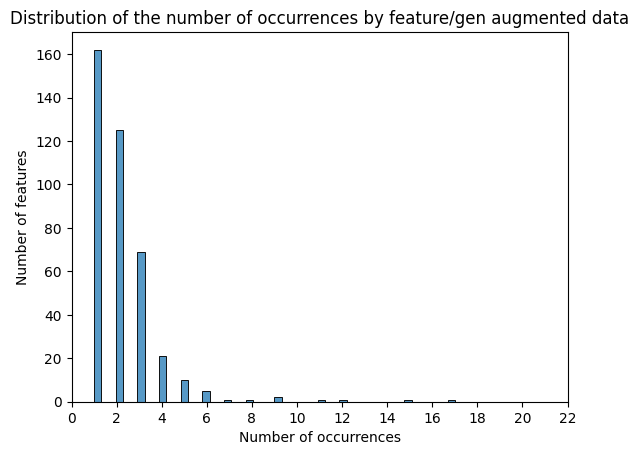

In [47]:
# plot the distribution of the count column
sns.histplot(result_acc_features_wide_augmented['count'], bins=50)
# make the x-axis integer values
plt.xticks(np.arange(0, 23, 2))
# set the x-axis label
plt.xlabel('Number of occurrences')
# set the y-axis label
plt.ylabel('Number of features')
# show the plot
# title of the plot
plt.title('Distribution of the number of occurrences by feature/gen augmented data')
plt.show()

In [97]:
# count the number of ocurrence ot top_features in the synthetic data
top_features_synthetic = result_acc_features_wide_augmented[result_acc_features_wide_augmented['selected_features_bin'].isin(top_features)]
top_features_synthetic = top_features_synthetic.sort_values('count', ascending=False)
top_features_synthetic = top_features_synthetic.reset_index(drop=True)
# create a column that compute count divided by the number of experiments in the original data
top_features_synthetic['count_normalized'] = round(top_features_synthetic['count'] / n_experiments_synthetic, 2)
top_features_synthetic.head(3)

,selected_features_bin,experiment_name,pob_accuracy_avg,pob_ngenes_avg,count,count_normalized
0,att_476,"mandelon_synthetic_0014_0, mandelon_synthetic_...","[0.844, 0.802, 0.807, 0.831, 0.812, 0.839, 0.8...","[43.0, 26.0, 26.0, 37.0, 25.0, 27.0, 26.0, 27....",17,0.57
1,att_339,"mandelon_synthetic_0014_0, mandelon_synthetic_...","[0.844, 0.833, 0.839, 0.795, 0.828, 0.847, 0.8...","[43.0, 29.0, 27.0, 34.0, 28.0, 29.0, 29.0, 22....",15,0.50
2,att_242,"mandelon_synthetic_0014_5, mandelon_synthetic_...","[0.812, 0.812, 0.825, 0.795, 0.847, 0.834, 0.8...","[33.0, 25.0, 34.0, 34.0, 29.0, 37.0, 24.0, 33....",12,0.40


## Gráfico de frecuencia de selección de características en los experimentos con dataset aumentado

In [ ]:
# Assuming the DataFrame is already loaded as df
df = result_acc_features_wide_augmented

# Filter the top 50 features by 'count'
top_features = df.nlargest(200, 'count')

# Expand the 'pob_accuracy_avg' and 'experiment_name' into individual rows
expanded_rows = []
for index, row in top_features.iterrows():
    accuracies = row['pob_accuracy_avg']
    experiment_names = row['experiment_name'].split(', ')
    
    if isinstance(accuracies, str):
        accuracies = eval(accuracies)

    for accuracy, exp_name in zip(accuracies, experiment_names):
        if 'leukemia_base_0008' not in exp_name.strip():
            expanded_rows.append({
                'selected_features_bin': row['selected_features_bin'],
                'pob_accuracy_avg': accuracy,
                'experiment_name': exp_name.strip()
            })

expanded_df = pd.DataFrame(expanded_rows)

# Create a pivot table for the heatmap
pivot_table = expanded_df.pivot_table(index='selected_features_bin', columns='experiment_name', values='pob_accuracy_avg', aggfunc='mean')

average_accuracy = pivot_table.mean(axis=1).sort_values(ascending=False)
sorted_pivot_table = pivot_table.loc[average_accuracy.index]

# Plot heatmap without annotations and sorted by average accuracy
plt.figure(figsize=(15, 30))  # Adjust the size accordingly
sns.heatmap(sorted_pivot_table, annot=False, cmap='viridis')
plt.title('Heatmap of Top 200 Features by Population Accuracy Average, Sorted')
plt.xlabel('Experiment Name')
# adjust the y-axis to include all the features
plt.yticks(np.arange(0.5, len(sorted_pivot_table), 1), sorted_pivot_table.index)
plt.ylabel('Selected Features')
# Save the plot to a file
plt.savefig('heatmap_top200_features_augmented.png', format='png', dpi=300)  # You can specify another path or format like 'pdf'
plt.show()


# Probability distribution of features by group



In [98]:
# rename the count_normalized in the dataset top_features_synthetic to count_normalized_synthetic
# rename the count_normalized in the dataset top_features_original to count_normalized_original
# merge the two datasets top_features_synthetic and top_features_original on the column selected_features_bin
# select the columns selected_features_bin, count_normalized_synthetic and count_normalized_original

top_features_synthetic = top_features_synthetic.rename(columns={'count_normalized': 'count_normalized_synthetic'})
top_features_original = top_features_original.rename(columns={'count_normalized': 'count_normalized_original'})
top_features = top_features_synthetic.merge(top_features_original, on='selected_features_bin')
top_features = top_features[['selected_features_bin', 'count_normalized_synthetic', 'count_normalized_original']]
top_features.head(3)



,selected_features_bin,count_normalized_synthetic,count_normalized_original
0,att_476,0.57,0.41
1,att_339,0.50,0.43
2,att_242,0.40,0.53


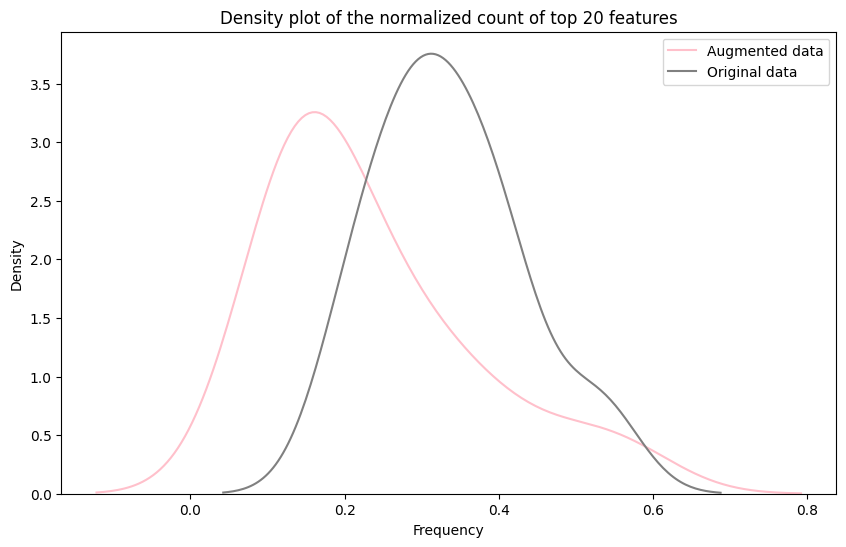

In [105]:
# plot the count_normalized_synthetic and count_normalized_original columns as density plots
plt.figure(figsize=(10, 6))
sns.kdeplot(top_features['count_normalized_synthetic'], label='Augmented data')
sns.kdeplot(top_features['count_normalized_original'], label='Original data')
# set the color of the plot to be: gray for original data and pink for augmented data
plt.gca().get_lines()[0].set_color('pink')
plt.gca().get_lines()[1].set_color('gray')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.title('Density plot of the normalized count of top 20 features')
plt.legend()
plt.show()


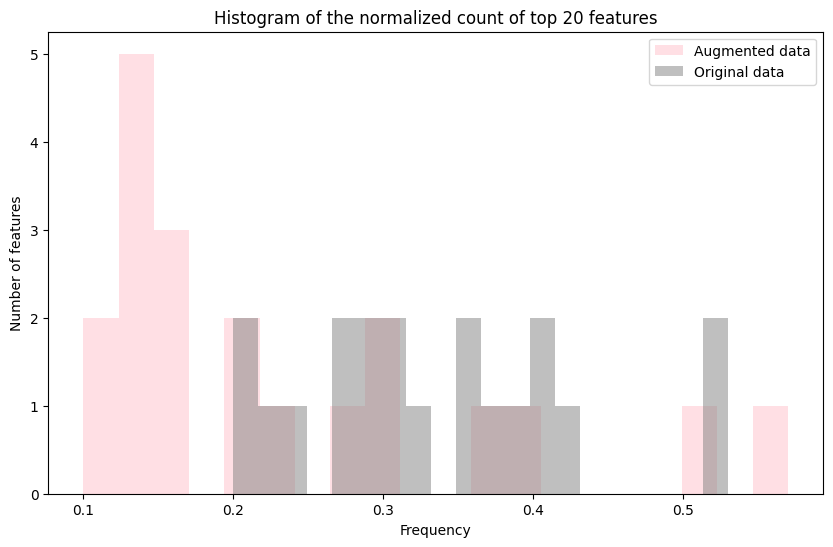

In [104]:
# draw a histogram of the count_normalized_synthetic and count_normalized_original columns 
# color the bars of the histogram with gray for original data and pink for augmented data
plt.figure(figsize=(10, 6))
plt.hist(top_features['count_normalized_synthetic'], bins=20, alpha=0.5, color='pink', label='Augmented data')
plt.hist(top_features['count_normalized_original'], bins=20, alpha=0.5, color='gray', label='Original data')
plt.xlabel('Frequency')
plt.ylabel('Number of features')
plt.title('Histogram of the normalized count of top 20 features')
plt.legend()
plt.show()
